## Manipulação de Imagens de Satélite Contento Eventos Extremos

O objetivo deste notebook é instanciar os principais passos para obtenção de imagens de eventos extremos para o treinamento dos
modelos de aprendizado profundo e reconhecimento de objetos por redes neurais convolutivas.

Inicialmente são descritos os formatos netCDF4 e como são manipulados os dados

A etapa seguinte descreve as bases de dados pesquisadas:

A base Goes-16 que contém diversos eventos extremos relacionados a eventos extremos capturados pelo satélite GOES da NOAA.

A base Hursat que contém um diversa coleção de imagens de eventos extremos relacionadas a diversos satélites diferentes.

In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import os


## Arquivos no Formato NETCDF4

O Network Common Data Form, ou netCDF, é uma interface para uma biblioteca de funções de acesso a dados para armazenar e recuperar dados na forma de matrizes.

O NetCDF é uma abstração que suporta uma exibição de dados como uma coleção de objetos portáteis autoexplicativos que podem ser acessados ​​por meio de uma interface simples. Valores de matriz podem ser acessados ​​diretamente, sem saber detalhes de como os dados são armazenados. Informações auxiliares sobre os dados, como quais unidades são usadas, podem ser armazenadas com os dados. Utilitários genéricos e programas aplicativos podem acessar conjuntos de dados netCDF e transformar, combinar, analisar ou exibir campos especificados dos dados. O desenvolvimento desses aplicativos levou a uma melhor acessibilidade dos dados e melhorou a reutilização de software para gerenciamento, análise e exibição de dados orientados por matriz.

O software netCDF implementa um tipo de dados abstrato, o que significa que todas as operações para acessar e manipular dados em um conjunto de dados netCDF devem usar apenas o conjunto de funções fornecidas pela interface. A representação dos dados é ocultada dos aplicativos que usam a interface, de modo que a forma como os dados são armazenados pode ser alterada sem afetar os programas existentes. A representação física dos dados netCDF é projetada para ser independente do computador no qual os dados foram gravados.

O Unidata suporta as interfaces netCDF para C (consulte Guia do usuário do NetCDF-C), Fortran (consulte o Guia do usuário do NetCDF-Fortran) e C ++ (consulte Guia de interface do NetCDF C ++).

A biblioteca netCDF é suportada por vários sistemas operacionais UNIX. Uma porta do MS Windows também está disponível. O software também é portado e testado em alguns outros sistemas operacionais, com assistência de usuários com acesso a esses sistemas, antes de cada grande lançamento. O software netCDF da Unidata está disponível gratuitamente via FTP para encorajar o seu uso generalizado.


## Dados do satélite Goes e como acessar

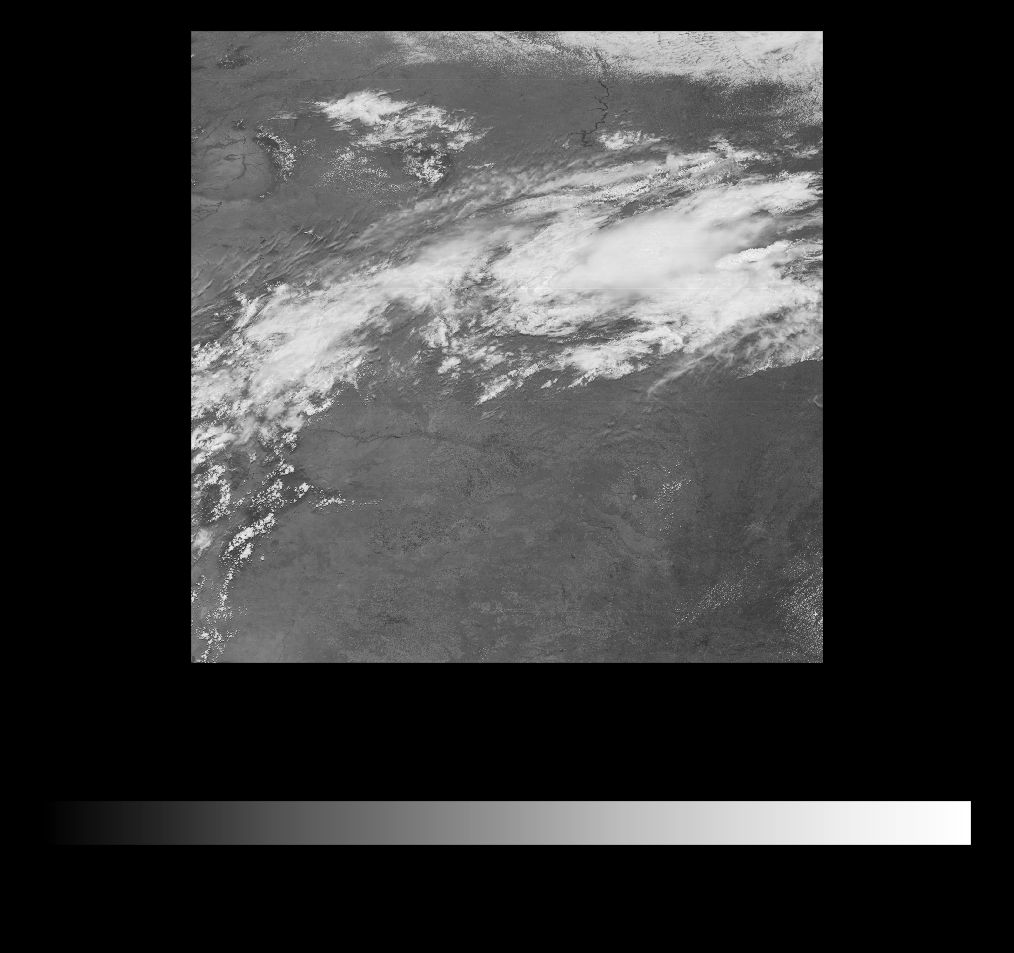

GOES - Geostationary Operational Environmental Satellite

A missão de satélites GOES (Geostationary Operational Environmental Satellite) é operada pela National Oceanic and Atmospheric Administration – NOAA e controlada pela National Aeronautics and Space Administration - NASA.

As imagens oferecidas regularmente são utilizadas pelos serviços de previsão do tempo dos países localizados no continente americano. Em conjunto com os satélites da série METEOSAT, o GOES completa a rede internacional de observação meteorológica da Terra.

Esses satélites geoestacionários encontram-se a cerca de 35.800 km da Terra, em órbita equatorial geossíncrona, com velocidade de deslocamento coincidente com a velocidade de rotação da Terra. Essas características orbitais permitem com que os satélites captem imagens de uma mesma porção da superfície terrestre e obtenham uma ampla visada.

Os satélites enviam imagens da Terra a cada 30 minutos, que são úteis para monitorar uma série de eventos que necessitam de dados contínuos, como os fenômenos atmosféricos, formação e desenvolvimento de nuvens, temperatura da superfície da terra, vapor d´água, sondagens da estrutura vertical da atmosfera e vapor contido na atmosfera.

A rede de satélites GOES foi iniciada na década de 1970, com o lançamento de dois satélites experimentais (SMS-1 e SMS-2) e desde 1975 colocou em órbita 15 satélites, sendo que atualmente somente 4 estão em atividades vinculadas ao programa.

Os satélites levam a bordo vários instrumentos sensores, alguns específicos para serem utilizados em meteorologia, que coletam dados de campos magnéticos e da estrutura vertical da atmosfera. Além desses instrumentos, ele leva a bordo um sensor imageador que opera com 5 bandas espectrais, nas faixas do visível e infravermelho.

Satélites GOES em operação, vinculados ao objetivo principal da missão que é obter informação global sobre o estado atmosférico:

a) GOES 12 (localizado a 60ºW, permite a cobertura da América do Sul);

b) GOES 13 (posicionado a 75ºW, em operação como “GOES East”);

c) GOES 14 (posicionado a 105°W, satélite em modo de espera) e

d) GOES 15 (posicionado a 135°W, em operação como “GOES West”).

e) GOES 16 :  O GOES 16 (chamado GOES-R antes de atingir a órbita) é operado pela National Oceanic and Atmospheric Administration dos Estados Unidos, dando sequencia ao sistema GOES. O satélite foi lançado ao espaço em 19 de novembro de 2016.

## Acesso aos dado GOES + NETCDF

In [2]:
pathOriginal = 'C:\/Users\/Administrador\/Desktop\/Hursat\/Data\/'
path_imagens_test = pathOriginal + 'goes_test_1\/'

lista_files = os.listdir(path_imagens_test)
print(lista_files)

##Definindo Dataset
dataset_goes = Dataset(path_imagens_test + lista_files[len(lista_files) - 1], mode='r')

['ABI-L1b-RadF_2000_001_12_OR_ABI-L1b-RadF-M3C02_G16_s20000011200000_e20000011200000_c20171941501140.nc', 'ABI-L1b-RadF_2018_021_01_OR_ABI-L1b-RadF-M3C05_G16_s20180210145391_e20180210156158_c20180210156206.nc', 'ABI-L1b-RadF_2018_021_01_OR_ABI-L1b-RadF-M3C06_G16_s20180210100391_e20180210111164_c20180210111193.nc', 'GLM-L2-LCFA_2018_044_16_OR_GLM-L2-LCFA_G16_s20180441610000_e20180441610200_c20180441610224(1).nc', 'GLM-L2-LCFA_2018_044_16_OR_GLM-L2-LCFA_G16_s20180441610000_e20180441610200_c20180441610224.nc', 'GLM-L2-LCFA_2018_044_16_OR_GLM-L2-LCFA_G16_s20180441610200_e20180441610400_c20180441610419.nc', 'OR_ABI-L2-CMIPF-M4C13_G16_s20161811455312_e20161811500135_c20161811500199.nc']


## Especificação de um dos arquivos 

In [52]:
dataset_goes

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    naming_authority: gov.nesdis.noaa
    Conventions: CF-1.7
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    standard_name_vocabulary: CF Standard Name Table (v25, 05 July 2013)
    institution: DOC/NOAA/NESDIS > U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    production_site: WCDAS
    production_environment: OE
    spatial_resolution: 2km at nadir
    orbital_slot: GOES-Test
    platform_ID: G16
    instrument_type: GOES R Series Advanced Baseline Imager
    scene_id: Full Disk
    instrument_ID: FM2
    dataset_name: OR_ABI-L2-CMIPF-M4C13_G16_s20161811455312_e20161811500135_c20161811500199.nc
    iso_series_metadata_id: 8c9e8150-3692-11e3-aa6e-0800200c9a66
    title: ABI L2 Cloud and Moisture Imagery
    summary: Single emissive band Cloud and Moisture Imagery Products 

## Extraindo Variaveis:


In [53]:
dataset_goes.variables

OrderedDict([('CMI', <class 'netCDF4._netCDF4.Variable'>
              int16 CMI(y, x)
                  _FillValue: -1
                  long_name: ABI L2+ Cloud and Moisture Imagery brightness temperature
                  standard_name: toa_brightness_temperature
                  _Unsigned: true
                  sensor_band_bit_depth: 12
                  valid_range: [   0 4095]
                  scale_factor: 0.03931624
                  add_offset: 173.15
                  units: K
                  resolution: y: 0.000056 rad x: 0.000056 rad
                  coordinates: band_id band_wavelength t y x
                  grid_mapping: goes_imager_projection
                  cell_methods: t: point area: point
                  ancillary_variables: DQF
              unlimited dimensions: 
              current shape = (5424, 5424)
              filling on), ('DQF', <class 'netCDF4._netCDF4.Variable'>
              int8 DQF(y, x)
                  _FillValue: -1
                  

## Extraindo Imagens

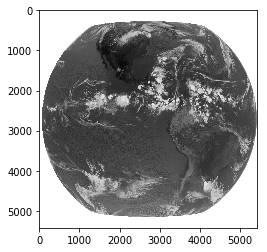

In [3]:
# Extrair os valores da temperatura de brilho do NetCDF
data = dataset_goes.variables['CMI'][:]
# plotando os dados
plt.imshow(data, cmap='Greys')

In [6]:
from mpl_toolkits.basemap import Basemap # Import the Basemap toolkit

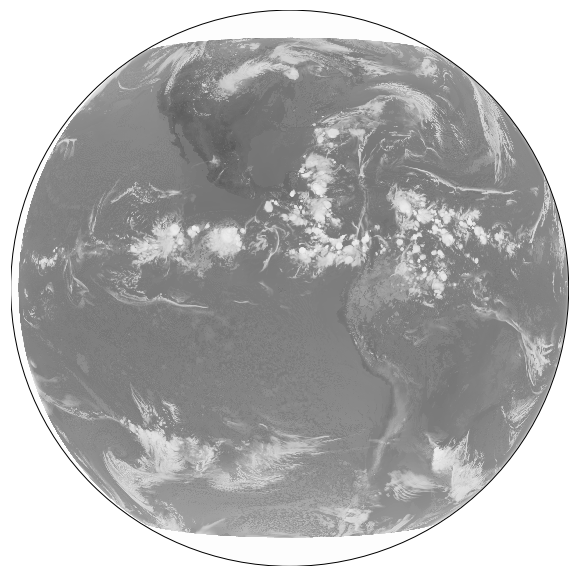

In [54]:
# Cria Basemap para projeção do satellite
plt.figure(figsize=(10,20)) 
bmap = Basemap(projection='geos', lon_0=-89.5, lat_0=0.0, satellite_height=35786023.0, ellps='GRS80')
# Plot chanell GOES-16 Canal usando 170 e 378 como os limites de temperatura
bmap.imshow(data, origin='upper', vmin=170, vmax=378, cmap='Greys')
 

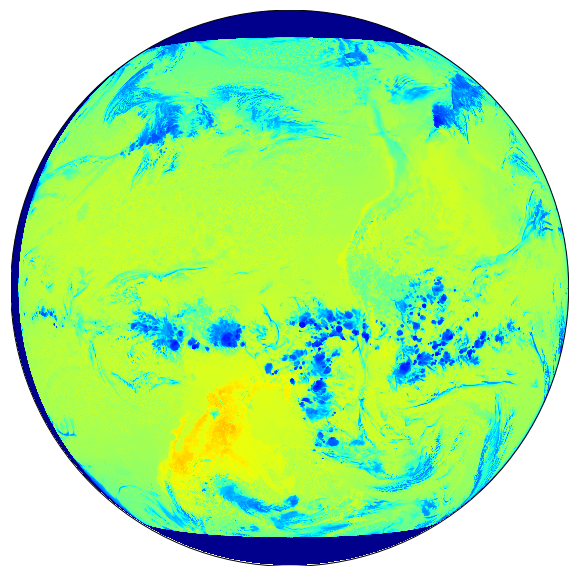

In [9]:
plt.figure(figsize=(10,20)) 
bmap = Basemap(projection='geos', lon_0=-89.5, lat_0=0.0, satellite_height=36786023.0, ellps='GRS80')
bmap.imshow(data, vmin=170, vmax=378, cmap='jet')


## 1-) Como extrair o número da banda do GOES-16, o início e o fim dos tempos de varredura com base no nome do arquivo.

## 2-) Como ler o cabeçalho do arquivo GOES-16 NetCDF para recuperar informações sobre a imagem.

## Observando o nome dos arquivos

OR_ABI-L2–CMIPF–M4C13_G16_sYYYYJJJHHMMSSs_eYYYYJJJHHMMSSs_cYYYYJJJHHMMSSs.nc

#### Que correspondem a:

OR: Operational System Real-Time Data

ABI-L2: Advanced Baseline Imager Level 2+

CMIPF: Cloud and Moisture Image Product – Full Disk

M3 / M4: ABI Mode 3 or ABI Mode 4

C13: Channel Number (Band 13 in this example)

G16: GOES-16

sYYYYJJJHHMMSSs: Observation Start

eYYYYJJJHHMMSSs: Observation End

cYYYYJJJHHMMSSs: File Creation

#### Outro Exemplo
ABI-L1b-RadF_2000_001_12_OR_ABI-L1b-RadF-M3C02_G16_s20000011200000_e20000011200000_c20171941501140.nc

ABI-L1b: Advanced Baseline Imager Level 1+

RadF: ?

C02: Channel Number (Band 2 in this example)

G16: GOES-16



Para extrair o número da banda e Observação de início e fim,
Precisamos pesquisar esses valores no nome do arquivo. No nosso caso o
nome do arquivo está na variável "path".

In [55]:
path = path_imagens_test + lista_files[0]


Band = (path[path.find("M3C")+3:path.find("_G16")])
print ("ABI Band: " + Band)

Start = (path[path.find("s")+1:path.find("_e")])
print ("Observation Start: " + Start)
 
End = (path[path.find("e")+1:path.find("_c")])
print ("Observation End: " + End)

ABI Band: \/Users\/Administrador\/Desktop\/Hursat\/Data\/hursat_test_1\/2010350N30175.OMEKA.2010.12.16.0000.52.MTS-1.022.hursat-b1.v06.n
Observation Start: ers\/Administrador\/Desktop\/Hursat\/Data\/hursat_test_1\/2010350N30175.OMEKA.2010.12.16.0000.52.MTS-1.022.hursat-b1.v06.n
Observation End: rs\/Administrador\/Desktop\/Hursat\/Data\/hursat_test_1\/2010350N30175.OMEKA.2010.12.16.0000.52.MTS-1.022.hursat-b1.v06.n


In [56]:
# ABI-L1b-RadF_2000_001_12_OR_ABI-L1b-RadF-M3C02
# ABI-L1b-RadF_2000_001_12_OR_ABI-L1b-RadF-M3C02_G16_s20000011200000
# ABI-L1b-RadF_2000_001_12_OR_ABI-L1b-RadF-M3C02_G16_s20000011200000_e20000011200000

Band = 'M3C02'
Start = '20000011200000'
End = '20000011200000'


### Recuperando a data de inicio e fim do evento

In [57]:
# Format the "Observation Start" string
Start_Formatted = Start[0:4] + " Day " + Start[4:7] + " - " + Start [7:9] + ":" + Start [9:11] + ":" + Start [11:13] + "." + Start [13:14] + " UTC"
print (Start_Formatted)
 
# Format the "Observation End" string
End_Formatted = End[0:4] + " Day " + End[4:7] + " - " + End [7:9] + ":" + End [9:11] + ":" + End [11:13] + "." + End [13:14] + " UTC"
print (End_Formatted)

2000 Day 001 - 12:00:00.0 UTC
2000 Day 001 - 12:00:00.0 UTC


## Dados Hursat

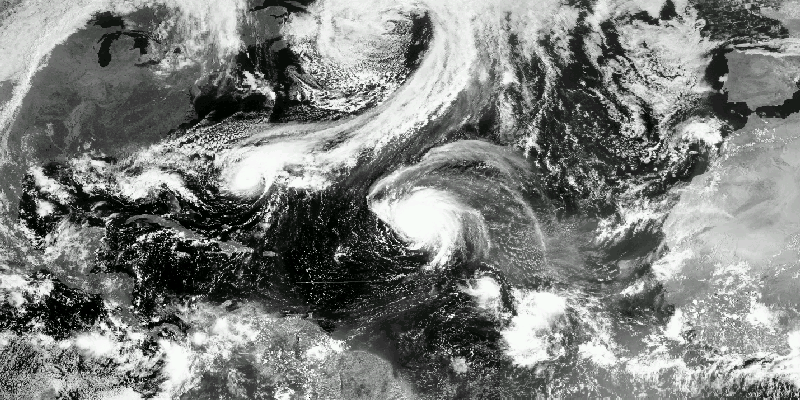

O objetivo do projeto HURSAT é fornecer dados de satélites "centrados" em ciclones tropicais. O objetivo é manter os dados pequenos e portáteis. Ao fazer isso, os dados do HURSAT são retificados e armazenados usando o formato de arquivo netCDF.

O projeto de dados HURSAT começou com HURSAT-B1, mas houve uma necessidade de dados HURSAT de outras fontes de dados de satélite (que possuem diferentes resoluções temporais e espaciais).

O HURSAT-B1 (Hurricane Satellite): Consiste de observações de ciclones tropicais ao redor do mundo. Os dados brutos referem-se a dados de satelites derivados dos dados de ISCCP B1 que se concentram em catalogar ciclones históricos. Os dados derivam-se dos satelites GOES, GMS e METEOSAT e cobrem o periodo de 1978 a 2019.

Os dados estão disponíveis em intervalos de 3 horas e são gradeadas para cerca de 8km
resolução. Os dados incluem a Banda infravermelha, visível e outros
canais disponíveis a partir dos instrumentos de satélite. Dados IBTrACS
foram temporalmente interpolados para coincidir com os dados do satélite
resolução. Os dados do satélite foram então reduzidos a 8 km, com
centros de grade fixos no centro de circulação do ciclone tropical.
Os dados incluem furacões do Atlântico, Pacífico e Índia
Bacias Oceânicas. Os dados são fornecidos em um formato NetCDF conveniente
que é auto-documentado e segue as convenções padrão de armazenamento e metadados.

### Lendo os dados HURSAT NETCDF



In [27]:
pathOriginal = 'C:\/Users\/Administrador\/Desktop\/Hursat\/Data\/'
path_imagens_test = pathOriginal + 'hursat_test_1\/'

lista_files = os.listdir(path_imagens_test)
print(lista_files)

##Definindo Dataset
dataset_hurst = Dataset(path_imagens_test + lista_files[0], mode='r')

['2010350N30175.OMEKA.2010.12.16.0000.52.MTS-1.022.hursat-b1.v06.nc', '2010350N30175.OMEKA.2010.12.16.0000.64.GOE-11.022.hursat-b1.v06.nc', '2010350N30175.OMEKA.2010.12.16.0300.52.MTS-1.022.hursat-b1.v06.nc', '2010350N30175.OMEKA.2010.12.16.0300.64.GOE-11.022.hursat-b1.v06.nc', '2010350N30175.OMEKA.2010.12.16.0600.52.MTS-1.022.hursat-b1.v06.nc', '2010350N30175.OMEKA.2010.12.16.0600.63.GOE-11.022.hursat-b1.v06.nc', '2010350N30175.OMEKA.2010.12.16.0900.52.MTS-1.022.hursat-b1.v06.nc', '2010350N30175.OMEKA.2010.12.16.0900.62.GOE-11.022.hursat-b1.v06.nc', '2010350N30175.OMEKA.2010.12.16.1200.52.MTS-1.022.hursat-b1.v06.nc', '2010350N30175.OMEKA.2010.12.16.1200.62.GOE-11.022.hursat-b1.v06.nc', '2010350N30175.OMEKA.2010.12.16.1500.53.MTS-1.022.hursat-b1.v06.nc', '2010350N30175.OMEKA.2010.12.16.1500.61.GOE-11.022.hursat-b1.v06.nc', '2010350N30175.OMEKA.2010.12.16.1800.53.MTS-1.022.hursat-b1.v06.nc', '2010350N30175.OMEKA.2010.12.16.1800.60.GOE-11.022.hursat-b1.v06.nc', '2010350N30175.OMEKA.2010.

## Principais caracteristicas do dataset

In [59]:
dataset_hurst

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    TC_id: 2010350N30175.OMEKA
    TC_serial_number: 2010350N30175
    TC_name: OMEKA
    IBTrACS_Version: v03r08
    base_date: [2010.   12.   16.]
    Conventions: CF-1.0
    created: Thu Nov 17 13:19:51 2016
    Projection: Mercator
    Satellite_Name: MTSAT-1R
    Sensor_Name: Missing
    B1_file: ISCCP.B1.0.MTS-1.2010.12.15.2332.JMA.gz
    B1U_file: ISCCP.B1U.a.MTS-1.2010.12.15.2332.JMA.gz
    MissingValue: Missing Values are -1.0
    title: HURSAT-B1
    summary: Gridded geostationary satellite observations (from ISCCP B1 data) centered 
on tropical cyclone center of circulation
    keywords: EARTH SCIENCE > Atmosphere > Atmospheric Phenomena > Hurricanes 
EARTH SCIENCE > Atmosphere > Atmospheric Phenomena > Typhoons 
EARTH SCIENCE > Atmosphere > Atmospheric Phenomena > Storms 
EARTH SCIENCE > Atmosphere > Atmospheric Phenomena > Cyclones 
EARTH SCIENCE > Atmosphere > Clouds > Cloud Top Temperat

In [60]:
# Verificando principais variaveis
variables = dataset_hurst.variables.keys()
print (variables)

odict_keys(['lat', 'lon', 'htime', 'fname', 'sid', 'NomDate', 'NomTime', 'sss', 'nchan', 'SubSatLat', 'SubSatLon', 'WindSpd', 'CentPrs', 'CentLat', 'CentLon', 'VZA', 'IRWIN', 'IRSPL', 'IRWVP', 'IRNIR', 'VSCHN', 'archer_lat', 'archer_lon', 'archer_combo_score', 'archer_ring_score', 'archer_weak_flag', 'eye_prob', 'eye_comp', 'rad_eye', 'rad_eye_con1', 'rad_eye_con2', 'eye_conf', 'rad_eyewall', 'bt_eye', 'bt_eyewall', 'odt84', 'vlat', 'vlon', 'var_icen', 'ang_icen', 'tavg_icen', 'tmin_icen', 'tmax_icen', 'tstd_icen', 'tnum_icen', 'var_acen', 'ang_acen', 'tavg_acen', 'tmin_acen', 'tmax_acen', 'tstd_acen', 'tnum_acen', 'var_vcen', 'ang_vcen', 'tavg_vcen', 'tmin_vcen', 'tmax_vcen', 'tstd_vcen', 'tnum_vcen'])


## Acesso aos dados como imagens

[[[296.9     296.84    297.01    ... 265.64    265.64    263.06   ]
  [296.9     296.84    296.95    ... 265.22998 265.22998 263.51   ]
  [296.84    296.95    296.95    ... 264.6     264.39    263.51   ]
  ...
  [286.83002 286.83002 284.3     ... 266.84    266.84    266.84   ]
  [291.13    284.93    284.3     ... 270.89    270.89    270.07   ]
  [291.13    284.93    284.93    ... 270.89    270.89    270.89   ]]]
(1, 301, 301)
[[296.9     296.84    297.01    ... 265.64    265.64    263.06   ]
 [296.9     296.84    296.95    ... 265.22998 265.22998 263.51   ]
 [296.84    296.95    296.95    ... 264.6     264.39    263.51   ]
 ...
 [286.83002 286.83002 284.3     ... 266.84    266.84    266.84   ]
 [291.13    284.93    284.3     ... 270.89    270.89    270.07   ]
 [291.13    284.93    284.93    ... 270.89    270.89    270.89   ]]
(301, 301)


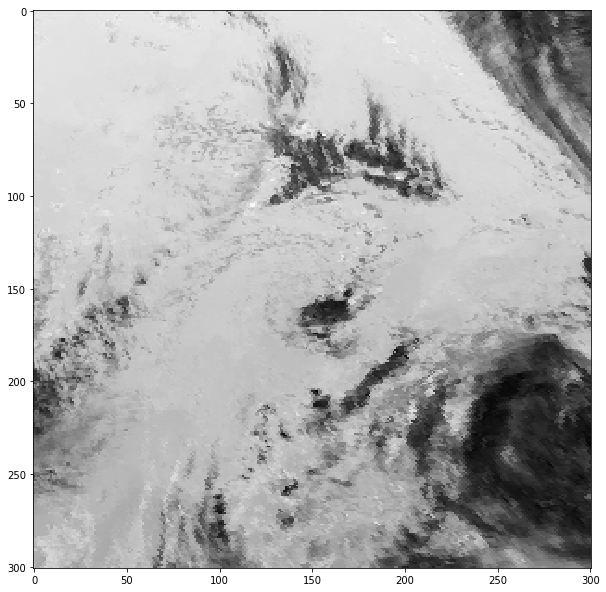

In [61]:
data2=dataset_hurst.variables['IRNIR'][:]
print(data2)
print(data2.shape)
vetorIMG = data2.reshape(301,301)
print(vetorIMG)
print(vetorIMG.shape)

plt.figure(figsize=(10,20))
plt.imshow(vetorIMG,cmap='gray')
plt.show()
# # Create the basemap reference for the Satellite Projection
# plt.figure(figsize=(10,20)) 
# bmap = Basemap(projection='geos', lon_0=-89.5, lat_0=0.0, satellite_height=35786023.0, ellps='GRS80')

# # Plot GOES-16 Channel using 170 and 378 as the temperature thresholds
# bmap.imshow(data2, origin='upper', cmap='Greys')